In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import scale
from scipy import stats

In [4]:
#Read the Dataset from CSV
df = pd.read_csv('train.csv')

In [5]:
#Read the first few lines of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# shape of the dataframe
df.shape

(1460, 81)

In [7]:
#Look at the statistics of the dataframe
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Find the Null values in the dataset
# Set the maximum rows that can be displayed
pd.options.display.max_rows=85
print("" ,df.isnull().sum())

 Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFi

In [10]:
# Find the Unique number of values for each column
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [11]:
#Find the percentage of Missing values across every column
total_rows = df.shape[0]
(df.isnull().sum()/total_rows)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [12]:
#Dropping the columns that has more than 10% of missing values
df.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley','LotFrontage'], axis=1, inplace=True)

In [13]:
#Checking the NULL percentage after removing some columns
(df.isnull().sum()/total_rows)*100

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
HeatingQC   

In [14]:
#Looking at the shape of the datset
df.shape

(1460, 75)

In [15]:
# Remove NULL rows in dataset
df.dropna(axis='rows', inplace=True)

In [16]:
#Looking at shape of the datset
df.shape

(1338, 75)

In [17]:
#Looking at the percetage of Null values after removing the NULL rows
(df.isnull().sum()/total_rows)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

In [18]:
#adding the derived columns
#Age of the building is the difference between the current time and the year built.
df['no_yrs_built'] = pd.datetime.now().year - df['YearBuilt']
#Years of the remodelling is the difference between the current time and the last remodel year.
df['no_yrs_remodel'] = pd.datetime.now().year - df['YearRemodAdd']
#Years of the Garage is the difference between the current time and the year in which the Garage is built
df['no_yrs_garage'] = pd.datetime.now().year - df['GarageYrBlt']

<ipython-input-18-f3808dc842dd>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['no_yrs_built'] = pd.datetime.now().year - df['YearBuilt']
<ipython-input-18-f3808dc842dd>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['no_yrs_remodel'] = pd.datetime.now().year - df['YearRemodAdd']
<ipython-input-18-f3808dc842dd>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['no_yrs_garage'] = pd.datetime.now().year - df['GarageYrBlt']


In [19]:
#Dropping the variables as the data is already derived from it
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'], axis = 1, inplace = True)

In [20]:
# The function takes numberic columns and the TARGET variable and draws a pair plot
def pair_plot(numeric_columns, y):
    sns.pairplot(df, x_vars=numeric_columns, y_vars=y)

In [21]:
y = "SalePrice"

In [22]:
numeric_columns = ['no_yrs_garage','no_yrs_built','no_yrs_remodel','LotArea', 'MasVnrArea', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF' ]

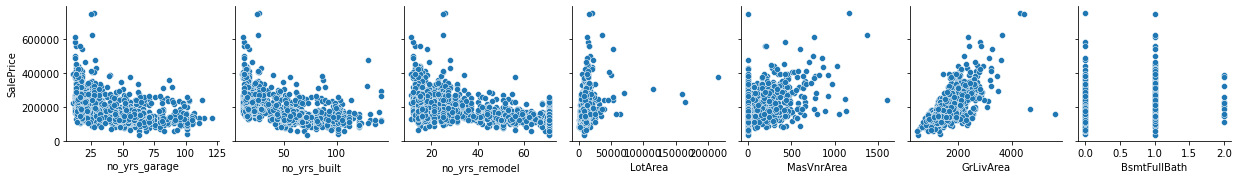

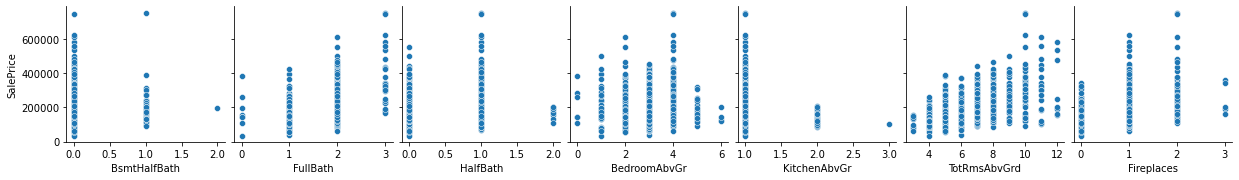

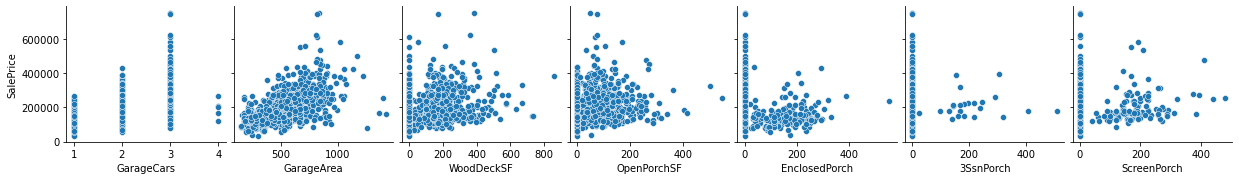

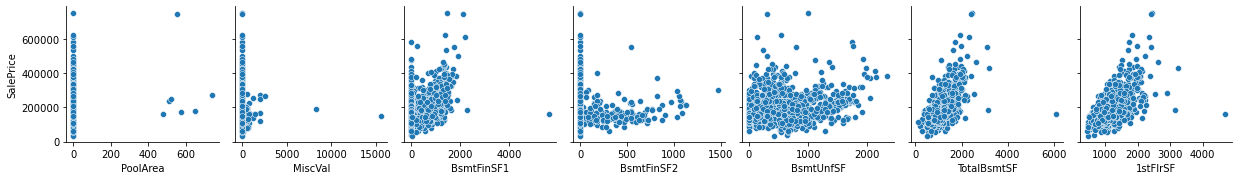

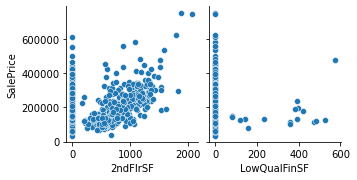

In [23]:
#Looping the numeric columns and plotting the pair plot. 
# Each row will have 7 pair plots
for i in range(0, len(numeric_columns), 7):
    pair_plot(numeric_columns[i: i+7], y)


##### Conclusion:
- As you see the number of years of building, remodel and garage increases, the sale value decreases.
- As 1stFlrSF and 2ndFlorSF increases, the Sale Price incerases


In [24]:

category_columns = ['BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','CentralAir','Condition1',
           'Condition2','Electrical','ExterCond','ExterQual','Exterior1st','Exterior2nd','Foundation','Functional',
            'GarageCond','GarageFinish','GarageQual','GarageType','Heating','HeatingQC','HouseStyle','KitchenQual',
            'LandContour','LandSlope','LotConfig','LotShape','MSSubClass','MSZoning','MasVnrType','MoSold',
         'Neighborhood','OverallCond','OverallQual','PavedDrive','RoofMatl','RoofStyle','SaleCondition','SaleType',
     'Street','Utilities','YrSold']

In [25]:
filtered_columns = []
# Removing the category column that has same value for more than 80% of rows
for column in category_columns:
    if(df[column].value_counts().max() > 1070):
        filtered_columns.append(column)

# removing those from categofy columns
for col in filtered_columns:
    category_columns.remove(col)
    
category_columns



['BsmtExposure',
 'BsmtFinType1',
 'BsmtQual',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'GarageFinish',
 'GarageType',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LotConfig',
 'LotShape',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'MoSold',
 'Neighborhood',
 'OverallCond',
 'OverallQual',
 'RoofStyle',
 'YrSold']

In [26]:
# Dropping the filtered columns from the dataset
df.drop(filtered_columns, axis = 1, inplace = True)

In [27]:
from matplotlib import pyplot
# Draw a box plot of category variables.
# it will have 2 box plots in each row.
def box_plot(xs,y):
    i = 0
    fig, axes = pyplot.subplots(ncols=2, figsize=(24, 5), sharey=True)
    for x in xs:
        sns.boxplot(x=x, y=y, data=df, orient='v', ax = axes[i])
        i = i + 1
    plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1338 non-null   int64  
 1   MSSubClass      1338 non-null   int64  
 2   MSZoning        1338 non-null   object 
 3   LotArea         1338 non-null   int64  
 4   LotShape        1338 non-null   object 
 5   LotConfig       1338 non-null   object 
 6   Neighborhood    1338 non-null   object 
 7   HouseStyle      1338 non-null   object 
 8   OverallQual     1338 non-null   int64  
 9   OverallCond     1338 non-null   int64  
 10  RoofStyle       1338 non-null   object 
 11  Exterior1st     1338 non-null   object 
 12  Exterior2nd     1338 non-null   object 
 13  MasVnrType      1338 non-null   object 
 14  MasVnrArea      1338 non-null   float64
 15  ExterQual       1338 non-null   object 
 16  Foundation      1338 non-null   object 
 17  BsmtQual        1338 non-null   o

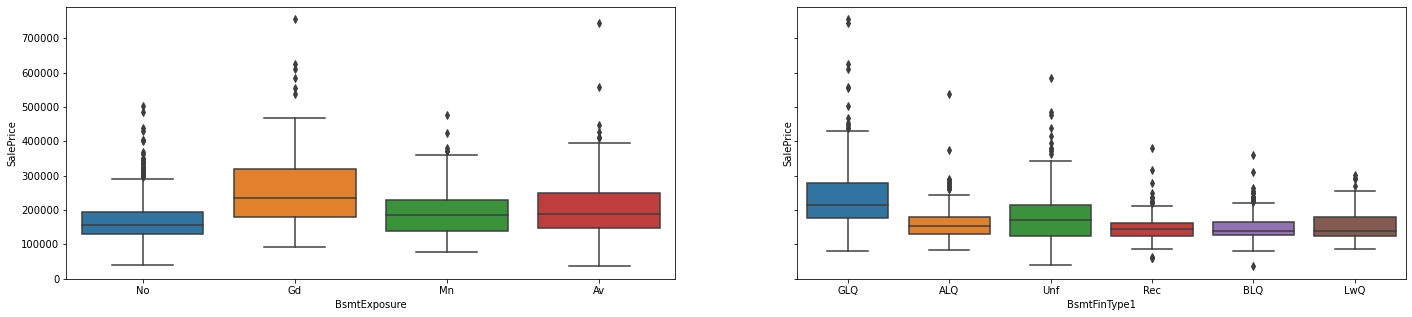

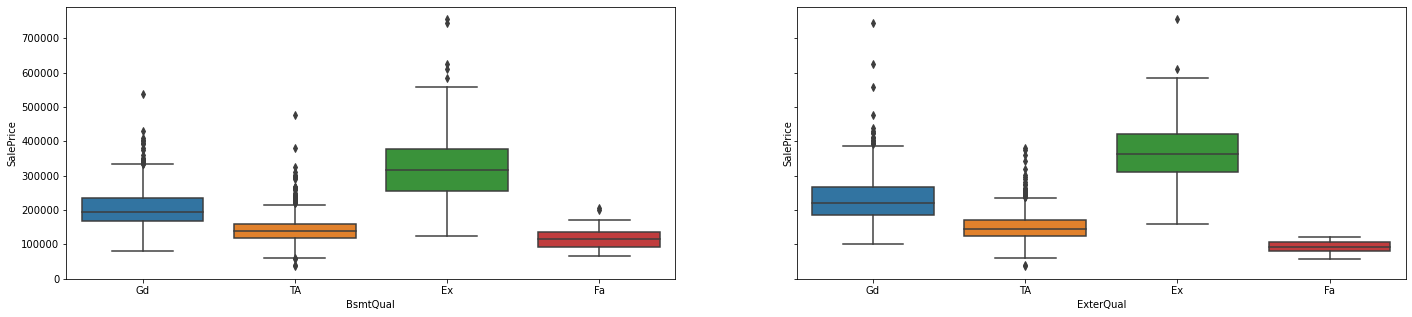

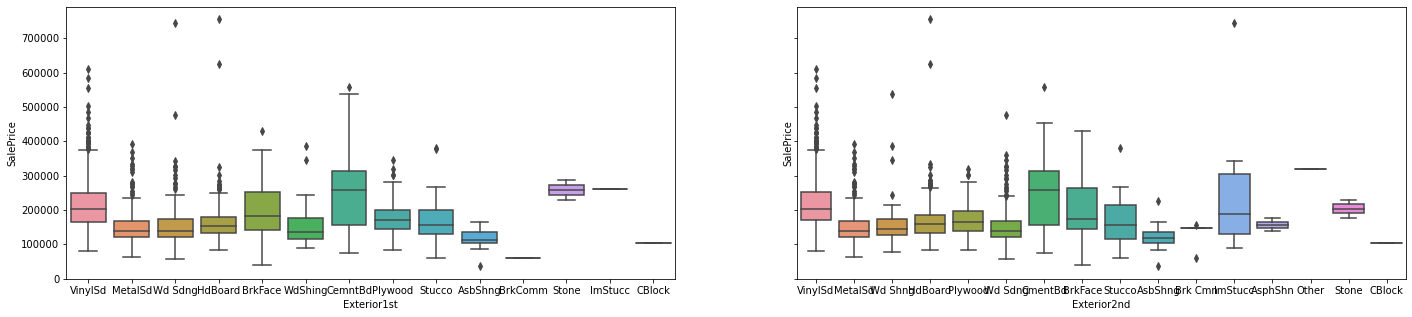

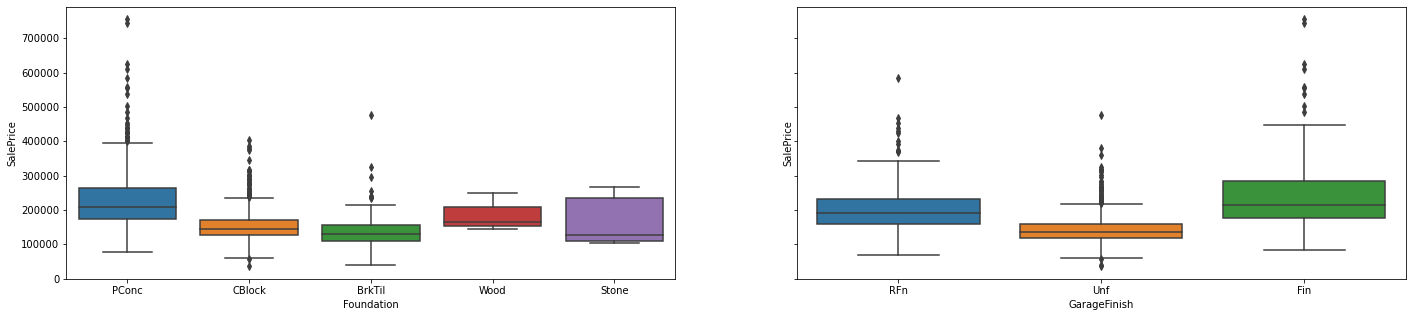

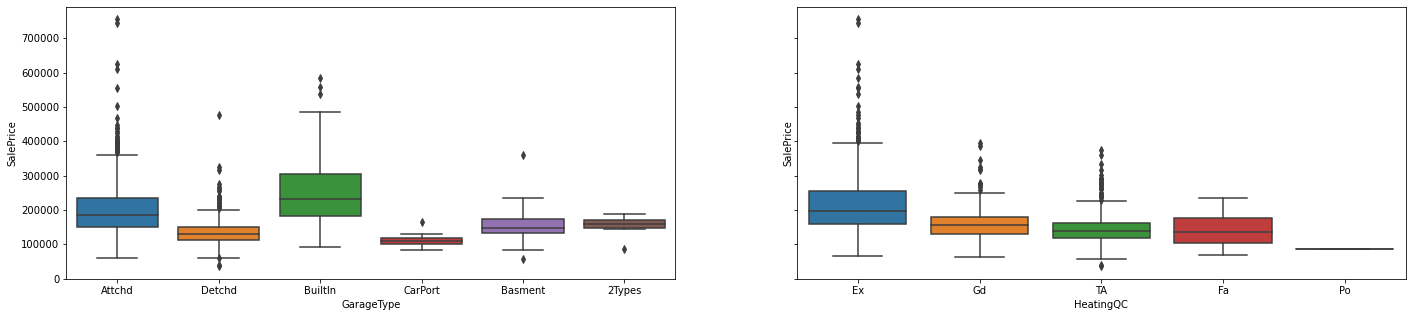

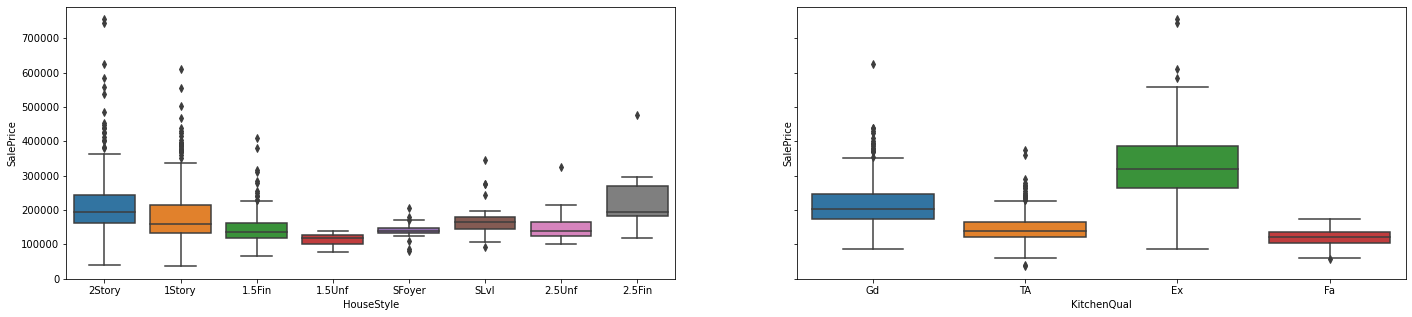

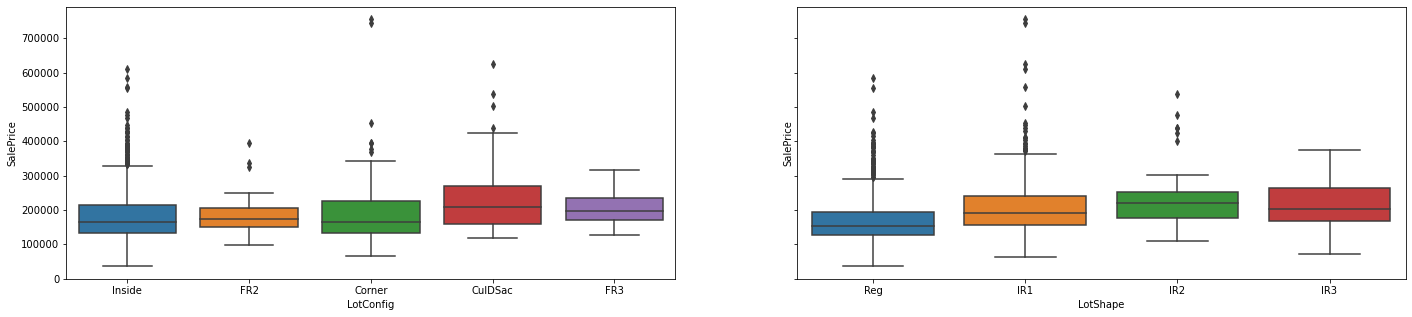

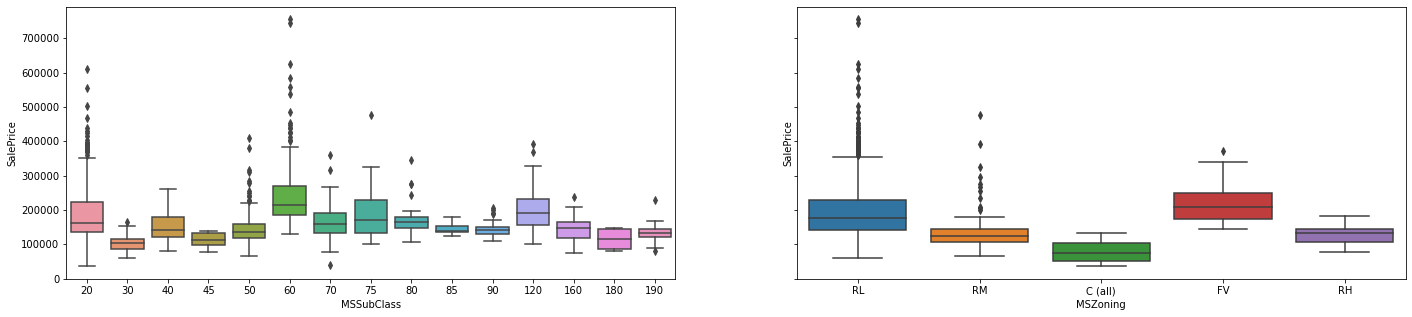

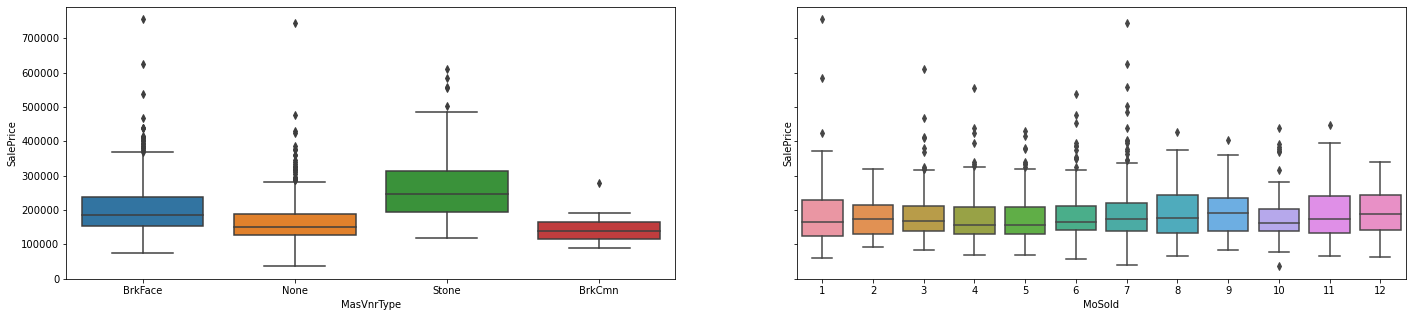

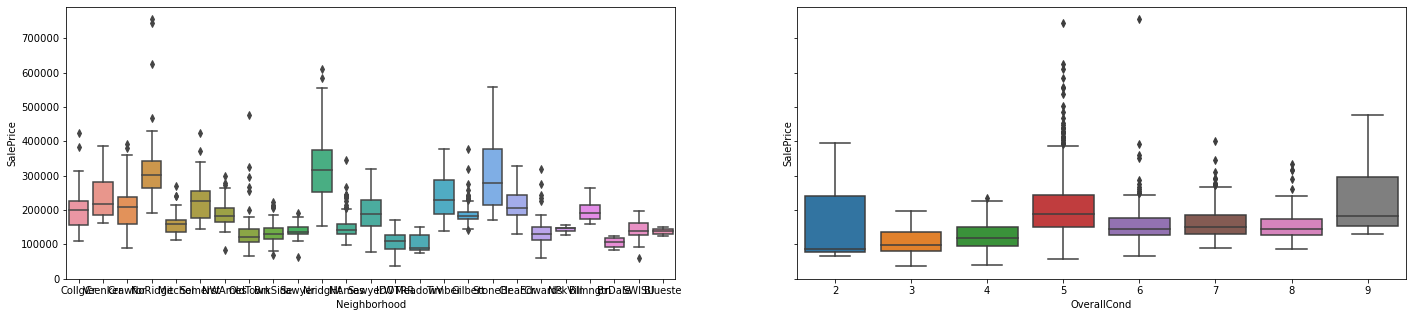

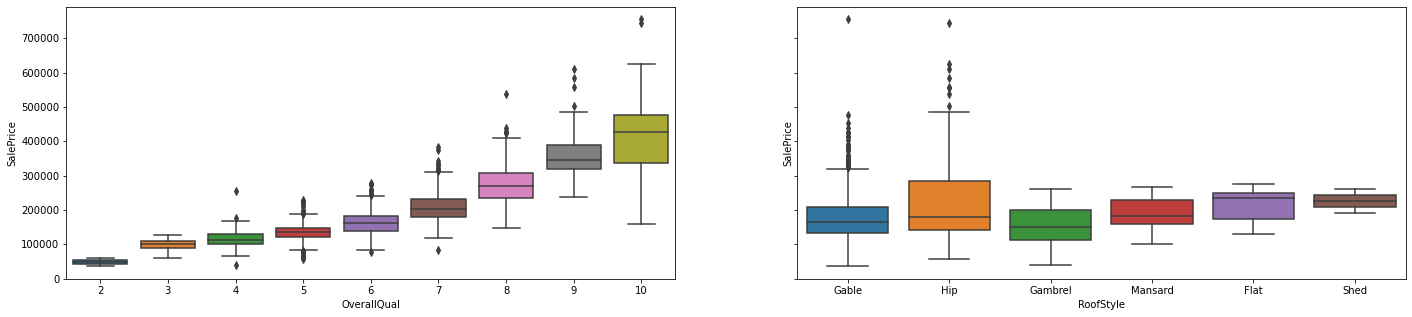

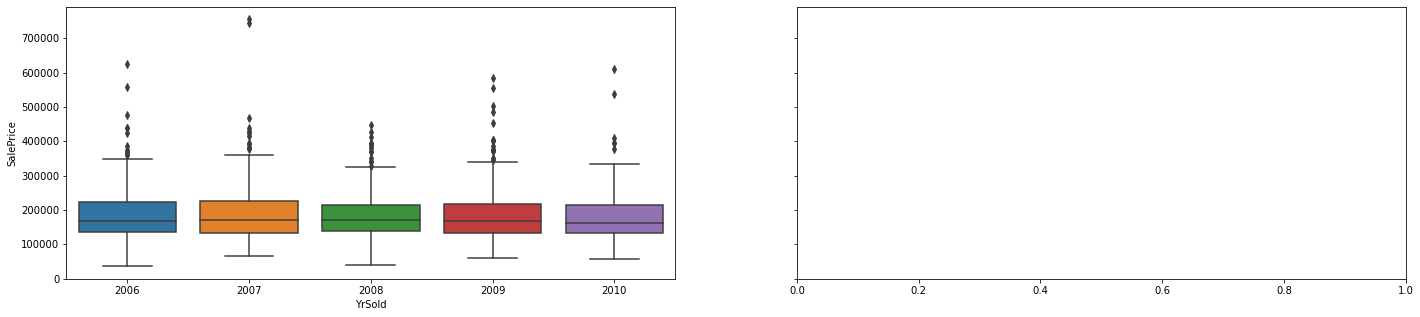

In [29]:
#Drawing the box plots for the category columns 
# Each row will have 2 box plots so , we are sending the range as 2 in for loop
for i in range(0, len(category_columns), 2):
    box_plot(category_columns[i:i+2], y)

##### Conclusion:
Quality of the house score indicator is strongest indicator of the house price. The price of the house constantly increases. 

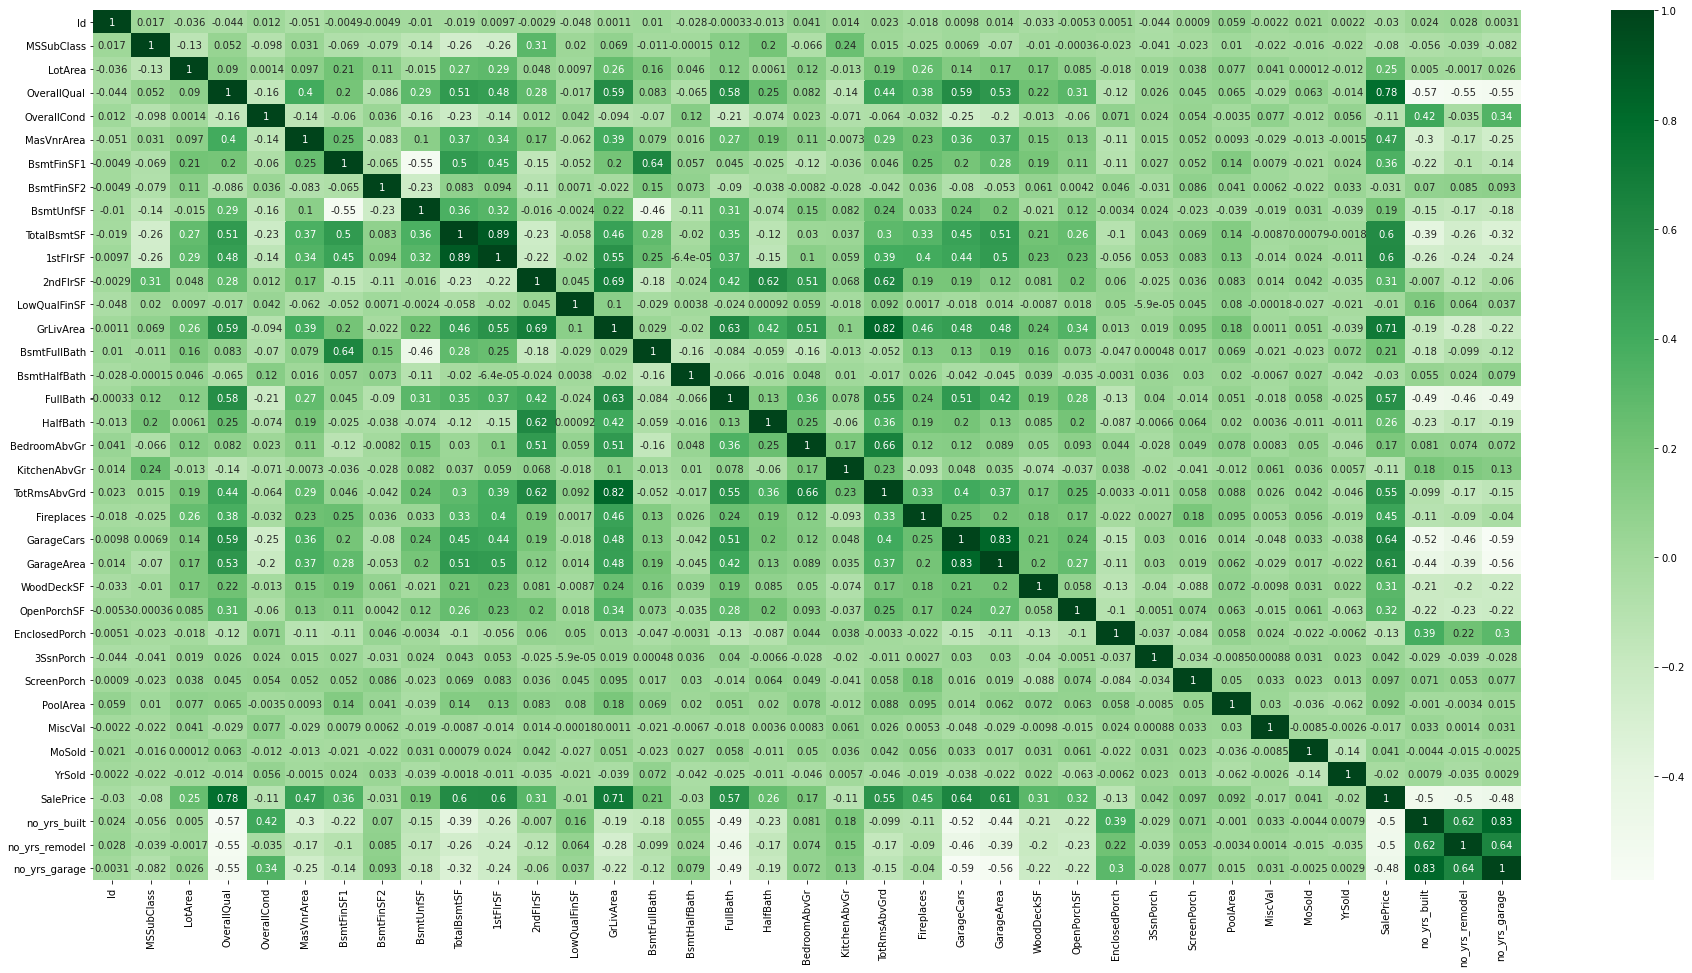

In [30]:
# Draw a heat map for the list of variables
plt.figure(figsize=(32,16))
sns.heatmap(df.corr(), annot=True,  cmap="Greens")
plt.show()

#### Conclusion:
- Garage Area, GrLiveArea, OverallQual,1stFloorSf, TotalBsmtSF scores have strong positive corelation
- no_yrs_built, no_yrs_remodel,no_yrs_garage have string negative corelation

In [31]:
for column in category_columns:
    # create the list of dummy variable for the categry columns
    dummies = pd.get_dummies(df[column], drop_first = True)
    # Create the prefix variable with column name and _
    prefix = column + "_"
    #Add the prefix variable to the dummy variable
    dummies = dummies.add_prefix(prefix)
    #Concatenate the dummy variable to the actual dataframe
    df = pd.concat([df, dummies], axis = 1)
    #Drop the original variable to avoid multi collinarity
    df.drop([column], axis = 1, inplace = True)

In [32]:
df.shape

(1338, 186)

In [33]:
#remocing data that are 3 standard deviation away.
z = np.abs(stats.zscore(df[numeric_columns]))
filtered_data = df[numeric_columns][(z < 3).all(axis=1)]
df = df.loc[filtered_data.index]


In [34]:
# Separatinng X and Y Variables
predict_column = "SalePrice"
y = df.loc[:, predict_column]
X = df.loc[:, df.columns != predict_column]

# scale the X variables using Standard Scaler
scaler = StandardScaler()
scaler.fit(X)


# Split the X and Y data to Test and Train Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 100)

#### Simple Linear Regression

In [35]:
lm = LinearRegression()
lm.fit(X_train, y_train)

#Predict the Y value for Test and Train 

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [36]:
metric = []
from sklearn.metrics import mean_squared_error, r2_score
# Calculate R2 for Training set
r2_train_lr = r2_score(y_train, y_pred_train)
print("The r2 value for Train" , r2_train_lr)
metric.append(r2_train_lr)

# Calculate R2 for Test set
r2_test_lr = r2_score(y_test, y_pred_test)
print("The r2 value for Test" , r2_test_lr)
metric.append(r2_test_lr)

# Calculate RSS for Train set
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("The rss value for Train" , rss1_lr)
metric.append(rss1_lr)

# Calculate RSS for Test set
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("The rss value for Test" ,  rss2_lr)
metric.append(rss2_lr)

# Calculate MSE for Train set
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("The MSE value for Train" , mse_train_lr)
metric.append(mse_train_lr**0.5)

# Calculate MSE for Test set
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("The MSE value for Test" ,mse_test_lr)
metric.append(mse_test_lr**0.5)

The r2 value for Train 0.9341959894226793
The r2 value for Test 0.920297683042961
The rss value for Train 185947010145.25757
The rss value for Test 121501275688.25848
The MSE value for Train 270271817.0715953
The MSE value for Test 411868731.14663893


In [37]:
#Printing the coefficients
pd.set_option('display.max_rows', 500)
model_parameters = list(lm.coef_)
cols = X.columns
i = 0
while i < len(model_parameters) :
    print( cols[i] ,'   ',  round(model_parameters[i], 2))
    i = i + 1

Id     -2.09
LotArea     1.23
MasVnrArea     8.77
BsmtFinSF1     14.57
BsmtFinSF2     15.06
BsmtUnfSF     1.27
TotalBsmtSF     30.9
1stFlrSF     5.5
2ndFlrSF     26.89
LowQualFinSF     -6.85
GrLivArea     25.54
BsmtFullBath     -469.75
BsmtHalfBath     -0.0
FullBath     1615.82
HalfBath     -1380.6
BedroomAbvGr     -3509.91
KitchenAbvGr     0.0
TotRmsAbvGrd     -30.04
Fireplaces     3510.52
GarageCars     4187.05
GarageArea     13.44
WoodDeckSF     20.14
OpenPorchSF     24.86
EnclosedPorch     -0.84
3SsnPorch     0.0
ScreenPorch     60.89
PoolArea     -0.0
MiscVal     10.63
no_yrs_built     -488.02
no_yrs_remodel     -46.51
no_yrs_garage     60.89
BsmtExposure_Gd     14414.61
BsmtExposure_Mn     -2522.24
BsmtExposure_No     -1967.73
BsmtFinType1_BLQ     5169.73
BsmtFinType1_GLQ     8503.56
BsmtFinType1_LwQ     -7162.68
BsmtFinType1_Rec     1148.48
BsmtFinType1_Unf     544.5
BsmtQual_Fa     -16307.91
BsmtQual_Gd     -17040.07
BsmtQual_TA     -17489.34
ExterQual_Fa     -2363.79
ExterQual

#### Ridge Regression

In [38]:
# The following contains the list of values in which we need to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
ridge_reg_cv_results = pd.DataFrame(model_cv.cv_results_)
ridge_reg_cv_results = ridge_reg_cv_results[ridge_reg_cv_results['param_alpha']<=100]
ridge_reg_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007889,0.001996,0.003586,0.000234,0.0001,{'alpha': 0.0001},-17034.769683,-15704.735734,-14738.552482,-15139.851426,...,-15771.708361,810.722310,24,-9981.466922,-10791.118197,-11104.449233,-10738.998352,-10622.315298,-10647.669600,369.333162
1,0.006915,0.000472,0.003159,0.000576,0.001,{'alpha': 0.001},-17030.185898,-15700.004309,-14717.250785,-15135.158428,...,-15762.673321,814.409065,23,-9982.994115,-10790.031297,-11104.668919,-10739.395704,-10622.995605,-10648.017128,368.762962
2,0.007449,0.001032,0.003175,0.000576,0.01,{'alpha': 0.01},-16981.576036,-15661.140039,-14603.574600,-15090.402174,...,-15696.878446,826.812121,22,-9999.826487,-10781.767397,-11107.683359,-10743.361607,-10631.064535,-10652.740677,362.932414
3,0.007497,0.000346,0.002955,0.000317,0.05,{'alpha': 0.05},-16767.402093,-15579.737741,-14432.059634,-14928.197826,...,-15532.528584,810.194861,21,-10078.817326,-10781.302123,-11127.931415,-10757.088267,-10664.843491,-10681.996525,340.140462
4,0.007405,0.000158,0.002842,0.000419,0.1,{'alpha': 0.1},-16549.166458,-15513.149711,-14371.034038,-14775.787281,...,-15416.865724,775.394509,20,-10161.745748,-10789.341453,-11160.516631,-10786.737343,-10694.675338,-10718.603303,321.121910
5,0.004467,0.000218,0.002110,0.000111,0.2,{'alpha': 0.2},-16232.049499,-15413.620572,-14306.985177,-14571.525403,...,-15257.679897,721.792733,19,-10271.132562,-10810.470733,-11206.801676,-10844.400672,-10729.476707,-10772.456470,299.482798
6,0.003874,0.000139,0.002030,0.000065,0.3,{'alpha': 0.3},-15997.253805,-15326.792083,-14266.505284,-14450.783620,...,-15148.721147,681.697282,17,-10339.899634,-10837.069017,-11236.610105,-10890.661849,-10753.926911,-10811.633503,287.527547
7,0.003869,0.000215,0.002114,0.000161,0.4,{'alpha': 0.4},-15813.399743,-15257.032482,-14228.351460,-14353.024045,...,-15061.304297,655.982197,16,-10390.263728,-10863.867829,-11261.684396,-10926.633844,-10773.918016,-10843.273562,280.167374
8,0.004010,0.000231,0.002251,0.000211,0.5,{'alpha': 0.5},-15667.504724,-15192.381394,-14194.162475,-14268.638017,...,-14987.851891,639.728351,15,-10431.180178,-10884.681183,-11282.111977,-10958.709036,-10794.642841,-10870.265043,274.285361
9,0.004338,0.000223,0.002024,0.000088,0.6,{'alpha': 0.6},-15567.783332,-15133.336090,-14160.583246,-14195.171686,...,-14928.921763,634.459887,14,-10465.375320,-10904.412382,-11301.984457,-10989.246779,-10813.704432,-10894.944674,270.478730


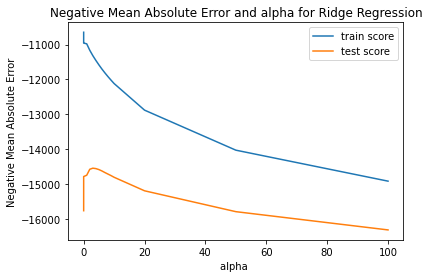

In [40]:
# plotting mean test and train scoes with alpha 
ridge_reg_cv_results['param_alpha'] = ridge_reg_cv_results['param_alpha'].astype('int32')
plt.plot(ridge_reg_cv_results['param_alpha'], ridge_reg_cv_results['mean_train_score'])
plt.plot(ridge_reg_cv_results['param_alpha'], ridge_reg_cv_results['mean_test_score'])
plt.xlabel('alpha ')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha for Ridge Regression")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [41]:
#Find the optimum alpha value from the ridge regression
model_cv.best_estimator_


Ridge(alpha=3.0)

In [42]:
#Use the best regression value to get the coefficient value
ridge = Ridge(alpha=3)
ridge.fit(X_train, y_train)
ridge.coef_

array([-2.11428075e+00,  1.27751570e+00,  8.76740049e+00,  1.65248202e+01,
        1.51959888e+01,  7.79340384e-01,  3.25001483e+01,  7.70180629e+00,
        2.80520901e+01, -1.20736764e+01,  2.36802199e+01, -1.40438492e+03,
        0.00000000e+00,  3.13204886e+03, -7.60192554e+02, -2.99781212e+03,
        0.00000000e+00,  9.96113898e+02,  4.23255618e+03,  3.75518445e+03,
        1.64846440e+01,  2.15740616e+01,  2.85750837e+01,  1.33322617e+01,
        0.00000000e+00,  6.95601140e+01,  0.00000000e+00,  8.15656630e+00,
       -4.46387653e+02, -1.40626032e+02,  1.53847156e+01,  1.19848865e+04,
       -3.97847698e+03, -2.23205912e+03,  4.00754606e+03,  9.03299134e+03,
       -5.64499236e+03,  2.67275393e+01,  1.28966152e+03, -1.11712796e+04,
       -1.52417417e+04, -1.34896293e+04, -9.71567316e+03, -1.73544344e+03,
       -3.17389693e+03,  0.00000000e+00,  1.14707200e+04, -1.07539585e+03,
        4.77751996e+03, -2.31968326e+03, -1.04053754e+03,  1.08250568e+03,
       -5.04047791e+03,  

In [43]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_ridge_train)
print("The R2 value on the Train dataset" , r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_ridge_test)
print("The R2 value on the Test dataset" , r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_ridge_train))
print("The RSS value on the Train dataset" , rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_ridge_test))
print("The RSS value on the Test dataset" , rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_ridge_train)
print("The MSE value on the Train dataset" , mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_ridge_test)
print("The MSE value on the Test dataset" , mse_test_lr)
metric2.append(mse_test_lr**0.5)

The R2 value on the Train dataset 0.9286007493948001
The R2 value on the Test dataset 0.9306953973352156
The RSS value on the Train dataset 201757872509.13586
The RSS value on the Test dataset 105650600337.98077
The MSE value on the Train dataset 293252721.6702556
The MSE value on the Test dataset 358137628.2643416


In [44]:
#The list of coefficients from the ridge regression
ridge.coef_

array([-2.11428075e+00,  1.27751570e+00,  8.76740049e+00,  1.65248202e+01,
        1.51959888e+01,  7.79340384e-01,  3.25001483e+01,  7.70180629e+00,
        2.80520901e+01, -1.20736764e+01,  2.36802199e+01, -1.40438492e+03,
        0.00000000e+00,  3.13204886e+03, -7.60192554e+02, -2.99781212e+03,
        0.00000000e+00,  9.96113898e+02,  4.23255618e+03,  3.75518445e+03,
        1.64846440e+01,  2.15740616e+01,  2.85750837e+01,  1.33322617e+01,
        0.00000000e+00,  6.95601140e+01,  0.00000000e+00,  8.15656630e+00,
       -4.46387653e+02, -1.40626032e+02,  1.53847156e+01,  1.19848865e+04,
       -3.97847698e+03, -2.23205912e+03,  4.00754606e+03,  9.03299134e+03,
       -5.64499236e+03,  2.67275393e+01,  1.28966152e+03, -1.11712796e+04,
       -1.52417417e+04, -1.34896293e+04, -9.71567316e+03, -1.73544344e+03,
       -3.17389693e+03,  0.00000000e+00,  1.14707200e+04, -1.07539585e+03,
        4.77751996e+03, -2.31968326e+03, -1.04053754e+03,  1.08250568e+03,
       -5.04047791e+03,  

#### Conclusion:

The best alpha value for  Ridge regression is 3.


#### Lasso Regression

In [45]:
# Perform the lasso regression
lasso = Lasso()
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59003803951.75245, tolerance: 209800016.4305653
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70780908072.8811, tolerance: 236962654.2075784
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75320614606.70352, tolerance: 236112045.6358293
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-pack

/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75005402845.44269, tolerance: 236112045.6358293
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69668207050.13544, tolerance: 225707874.40911075
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65536863594.84605, tolerance: 221406938.5347463
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-pa

/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63544976007.261505, tolerance: 221406938.5347463
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57754996650.39929, tolerance: 209800016.4305653
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69475100778.6422, tolerance: 236962654.2075784
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-pac

/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2122619072.0475006, tolerance: 225707874.40911075
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31815161426.88539, tolerance: 221406938.5347463
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45961944227.812096, tolerance: 209800016.4305653
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [46]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=100]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
25,100,-11898.566897,-14667.824836,1
24,50,-11344.768536,-14684.234058,2
23,20,-11029.669722,-14887.961076,3
22,10.0,-10874.782356,-15160.516534,4
21,9.0,-10855.592503,-15192.831713,5
20,8.0,-10835.963741,-15226.717093,6
19,7.0,-10815.375566,-15285.372250,7
18,6.0,-10792.725446,-15344.246308,8
17,5.0,-10767.336564,-15398.399325,9
16,4.0,-10736.457418,-15423.703683,10


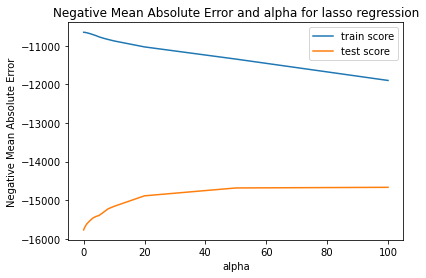

In [47]:
#Plotting the Test and Train score for error 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha for lasso regression")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [48]:
print(lasso_model_cv.best_params_)

{'alpha': 100}


In [49]:
# Fittinng the model with the alpha value
alpha =100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [50]:
#Display the value of coefficients
lasso.coef_

array([-2.19932068e+00,  1.32172137e+00,  1.37266763e+01,  3.25327536e+01,
        2.81870820e+01,  1.79321145e+01,  1.87123903e+01,  1.89223293e+01,
        4.01666513e+01, -8.64198679e+00,  1.05070578e+01, -0.00000000e+00,
        0.00000000e+00,  3.24286286e+03, -0.00000000e+00, -2.04602880e+03,
        0.00000000e+00,  1.42238569e+03,  4.13751590e+03,  3.32410523e+03,
        1.97641933e+01,  2.28157415e+01,  3.15479240e+01,  9.61065849e+00,
        0.00000000e+00,  7.11890469e+01,  0.00000000e+00,  6.21789102e+00,
       -4.38542085e+02, -2.16532285e+02,  1.50900840e+01,  1.10924543e+04,
       -1.01280362e+03, -0.00000000e+00,  1.73648962e+03,  7.47651249e+03,
       -4.37434987e+03,  0.00000000e+00, -0.00000000e+00, -3.68416959e+03,
       -1.26558737e+04, -9.16428828e+03, -0.00000000e+00,  0.00000000e+00,
       -2.27498679e+03,  0.00000000e+00,  9.04501747e+03, -0.00000000e+00,
        0.00000000e+00, -1.08365913e+03, -0.00000000e+00,  0.00000000e+00,
       -2.32640832e+03,  

In [51]:
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_lasso_train)
print("The R2 value for the train dataset" , r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_lasso_test)
print("The R2 value for the test dataset" , r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_lasso_train))
print("The RSS value for the train dataset" ,rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_lasso_test))
print("The RSS value for the test dataset" , rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_lasso_train)
print("The MSE value for the train dataset" ,mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_lasso_test)
print("The MSE value for the test dataset" ,mse_test_lr)
metric3.append(mse_test_lr**0.5)

The R2 value for the train dataset 0.9207113264851088
The R2 value for the test dataset 0.9337490548875692
The RSS value for the train dataset 224051568424.5974
The RSS value for the test dataset 100995487384.0368
The MSE value for the train dataset 325656349.45435673
The MSE value for the test dataset 342357584.35266715


#### Conclusion:
- The optimum alpha value using Lasso Regression is 100.
- MSE value has reduced compared to Ridge regression
- Many of the coefficients have become 0

In [52]:
#Printing all the statistics across LR, Ridge and Lasso,
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.341960e-01,9.286007e-01,9.207113e-01
1,R2 Score (Test),9.202977e-01,9.306954e-01,9.337491e-01
2,RSS (Train),1.859470e+11,2.017579e+11,2.240516e+11
3,RSS (Test),1.215013e+11,1.056506e+11,1.009955e+11
4,MSE (Train),1.643995e+04,1.712462e+04,1.804595e+04
5,MSE (Test),2.029455e+04,1.892452e+04,1.850291e+04


In [53]:
final_coeff = pd.DataFrame(index=X.columns)

In [54]:
final_coeff.rows = X.columns

<ipython-input-54-a1556d4192b3>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  final_coeff.rows = X.columns


In [55]:
#Printing the list of coefficients
final_coeff['Linear'] = lm.coef_
final_coeff['Ridge'] = ridge.coef_
final_coeff['Lasso'] = lasso.coef_

In [56]:
pd.set_option('display.max_rows', None)
final_coeff.head(100)

,Linear,Ridge,Lasso
Id,-2.092093e+00,-2.114281,-2.199321
LotArea,1.226192e+00,1.277516,1.321721
MasVnrArea,8.772006e+00,8.767400,13.726676
BsmtFinSF1,1.456991e+01,16.524820,32.532754
BsmtFinSF2,1.505933e+01,15.195989,28.187082
BsmtUnfSF,1.267454e+00,0.779340,17.932115
TotalBsmtSF,3.089670e+01,32.500148,18.712390
1stFlrSF,5.502971e+00,7.701806,18.922329
2ndFlrSF,2.689175e+01,28.052090,40.166651
LowQualFinSF,-6.853076e+00,-12.073676,-8.641987


Conclusion:
    
    The optimum value of ridge regression is 6 
    The optimum value of Lasso Regression is 100
    The final equation of Ridge regression is very complex. We should always chose a simple model.
    Lasso Regression equation is simpler as many of hte coefficients become 0
    Lasso Regression has feature selection. Hence it is a better model than ridge.
    
    

#### Question 1 from subjective question:

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?




#### Ridge regression with double the value of alpha from 3 to 6

In [57]:
# Doing ridge regression with alpha as 6
ridge_doubled = Ridge(alpha=6)
ridge_doubled.fit(X_train, y_train)
# Printing the coefficients of Ridge with alpha as 6
ridge_doubled.coef_

array([-2.24907630e+00,  1.35005615e+00,  1.06775509e+01,  1.76676084e+01,
        1.54111580e+01,  1.09825695e+00,  3.41770227e+01,  7.92151209e+00,
        2.94005248e+01, -1.44232856e+01,  2.28987513e+01, -1.32258970e+03,
        0.00000000e+00,  3.17068897e+03, -4.22638016e+02, -3.23156331e+03,
        0.00000000e+00,  1.49483078e+03,  4.47783016e+03,  3.58601927e+03,
        1.81204434e+01,  2.16615178e+01,  3.17883974e+01,  1.50584161e+01,
        0.00000000e+00,  6.84218158e+01,  0.00000000e+00,  7.29301983e+00,
       -4.43156078e+02, -1.79507639e+02,  2.05607816e+01,  1.06191097e+04,
       -3.93017996e+03, -2.23187010e+03,  3.54967370e+03,  8.78822988e+03,
       -5.15852570e+03, -2.33174592e+02,  1.25639681e+03, -7.81041579e+03,
       -1.39739209e+04, -1.11861163e+04, -7.25845413e+03, -1.62487155e+03,
       -4.12053547e+03,  0.00000000e+00,  9.50049559e+03, -1.27579162e+03,
        4.83307284e+03, -1.82733565e+03, -5.65670037e+02,  8.51998256e+02,
       -4.88635377e+03,  

In [58]:
alpha =200
# Doing ridge regression with Lasso as 200
lasso_doubled = Lasso(alpha=alpha)
lasso_doubled.fit(X_train, y_train) 
# Printing the coefficients of Ridge with alpha as 200
lasso_doubled.coef_

array([-2.40922935e+00,  1.52015613e+00,  1.38415943e+01,  3.63896057e+01,
        2.97169121e+01,  2.00368962e+01,  2.07686470e+01,  1.80441227e+01,
        4.02156998e+01,  0.00000000e+00,  1.08223226e+01, -0.00000000e+00,
        0.00000000e+00,  2.12255755e+03, -0.00000000e+00, -1.61563488e+03,
        0.00000000e+00,  2.04278153e+03,  4.32641018e+03,  1.41536555e+03,
        2.82681345e+01,  2.05189579e+01,  3.88149817e+01,  1.46484717e+01,
        0.00000000e+00,  6.83153140e+01,  0.00000000e+00,  5.17551335e+00,
       -4.46828648e+02, -2.90075074e+02,  2.95129848e+01,  8.42393485e+03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  6.90987529e+03,
       -2.53996515e+03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.05232203e+04, -5.79238948e+03, -0.00000000e+00,  0.00000000e+00,
       -4.63507678e+03,  0.00000000e+00,  3.58130482e+03, -0.00000000e+00,
        0.00000000e+00, -2.31730916e+02,  0.00000000e+00,  0.00000000e+00,
       -2.11158786e+03,  

In [59]:
final_coeff['Ridge_doubled'] = ridge_doubled.coef_
final_coeff['Lasso_doubled'] = lasso_doubled.coef_

In [60]:
# Printing the table with Ridge, Lasso, Doubled value of Alpha in Ridge and Lasso
final_coeff

,Linear,Ridge,Lasso,Ridge_doubled,Lasso_doubled
Id,-2.092093e+00,-2.114281,-2.199321,-2.249076,-2.409229
LotArea,1.226192e+00,1.277516,1.321721,1.350056,1.520156
MasVnrArea,8.772006e+00,8.767400,13.726676,10.677551,13.841594
BsmtFinSF1,1.456991e+01,16.524820,32.532754,17.667608,36.389606
BsmtFinSF2,1.505933e+01,15.195989,28.187082,15.411158,29.716912
BsmtUnfSF,1.267454e+00,0.779340,17.932115,1.098257,20.036896
TotalBsmtSF,3.089670e+01,32.500148,18.712390,34.177023,20.768647
1stFlrSF,5.502971e+00,7.701806,18.922329,7.921512,18.044123
2ndFlrSF,2.689175e+01,28.052090,40.166651,29.400525,40.215700
LowQualFinSF,-6.853076e+00,-12.073676,-8.641987,-14.423286,0.000000


In [61]:
final_coeff.to_csv('file1.csv')

#### Question 3:

After building the model, you realised that the five most important predictor variables in
the lasso model are not available in the incoming data. You will now have to create another model excluding 
the five most important predictor variables. Which are the five most important predictor variables now?

In [62]:
# Dropping the 5 most important variables from the training set
# Removing these 'OverallQual_9','Neighborhood_StoneBr','Neighborhood_Crawfor','OverallCond_3', 'MSSubClass_160'
# as these are the most important variable.

X_train.drop(['OverallQual_9','Neighborhood_StoneBr','Neighborhood_Crawfor','OverallCond_3', 'MSSubClass_160'], axis = 1,  inplace=True)

/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:

X_train.columns

Index(['Id', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'OverallQual_10', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'YrSold_2007',
       'YrSold_2008', 'YrSold_2009', 'YrSold_2010'],
      dtype='object', length=180)

In [64]:
#Dropping the 5 most important variables from the test set
X_test.drop(['OverallQual_9','Neighborhood_StoneBr','Neighborhood_Crawfor','OverallCond_3', 'MSSubClass_160'], axis = 1,  inplace=True)

In [65]:
X_test.columns

Index(['Id', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'OverallQual_10', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'YrSold_2007',
       'YrSold_2008', 'YrSold_2009', 'YrSold_2010'],
      dtype='object', length=180)

In [66]:
# Building a Lasso Regression Model for with the new columns
lasso = Lasso()
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60945501807.052505, tolerance: 209800016.4305653
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74201797083.93864, tolerance: 236962654.2075784
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77571607926.80316, tolerance: 236112045.6358293
  model = cd_fast.enet_coordinate_descent(


Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75066863837.38498, tolerance: 225707874.40911075
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68816917231.37297, tolerance: 221406938.5347463
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60945148888.82567, tolerance: 209800016.4305653
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-pa

/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77225675350.10994, tolerance: 236112045.6358293
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75213627484.57193, tolerance: 225707874.40911075
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68289778257.02516, tolerance: 221406938.5347463
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-pa

/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73518700764.92839, tolerance: 236962654.2075784
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70493960514.57451, tolerance: 236112045.6358293
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74546015886.40611, tolerance: 225707874.40911075
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-pa

/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10168413591.472504, tolerance: 209800016.4305653
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6903214636.945953, tolerance: 236112045.6358293
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5153363610.954681, tolerance: 225707874.40911075
  model = cd_fast.enet_coordinate_descent(
/Users/jagannathan/opt/anaconda3/lib/python3.8/site-p

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# Finding the optimal alpa
print(lasso_model_cv.best_params_)

{'alpha': 20}


In [68]:
alpha =20
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=20)

In [69]:
# The coefficients of features after running the lasso with 20 variables
lasso.coef_

array([-2.14488602e+00,  1.37229521e+00,  8.62678821e+00,  3.08399080e+01,
        3.04028793e+01,  1.54824700e+01,  1.57921501e+01,  2.37370757e+01,
        4.07187751e+01, -3.39997551e+01,  1.06211093e+01, -8.67839132e+02,
        0.00000000e+00,  1.89381457e+03, -1.66354978e+03, -2.47385459e+03,
        0.00000000e+00,  3.38646510e+02,  3.86035374e+03,  3.01813540e+03,
        1.40235506e+01,  2.25511245e+01,  2.81719033e+01,  1.91929968e+01,
        0.00000000e+00,  6.30970050e+01,  0.00000000e+00,  8.19287010e+00,
       -4.22029088e+02, -1.11080705e+02,  2.67170428e+01,  1.25326582e+04,
       -2.64167773e+03, -1.98754987e+03,  4.35359574e+03,  1.02696401e+04,
       -4.79507970e+03,  0.00000000e+00,  2.31310041e+03, -1.60820488e+04,
       -1.85459387e+04, -1.85215548e+04, -5.02382017e+03,  0.00000000e+00,
       -3.42912265e+01,  0.00000000e+00,  1.76369287e+04, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  6.71915853e+03,
       -2.55221404e+03,  

In [70]:
lasso_coeff = pd.DataFrame(index=X_train.columns)
lasso_coeff['Lasso_after_5_removal'] = lasso.coef_

In [71]:
# Printing the lasso coefficients after the removal of all the 5 improtant variables
lasso_coeff

,Lasso_after_5_removal
Id,-2.144886
LotArea,1.372295
MasVnrArea,8.626788
BsmtFinSF1,30.839908
BsmtFinSF2,30.402879
BsmtUnfSF,15.482470
TotalBsmtSF,15.792150
1stFlrSF,23.737076
2ndFlrSF,40.718775
LowQualFinSF,-33.999755


In [72]:
lasso_coeff.to_csv('file2.csv')